<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><img src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Automobile - Predict "Price"</font></h1>
<h2 align="center"><font size="5">Deadline: 2020-11-29 18:00:00</font></h2>
<h3 align="center"><font size="5"> Total marks: 4.0</font></h3>

### Your information:
- Fullname: Trần Hoàng Bách

- Date of birth: 01/10/1993

- Email: bach.tranhoang@gmail.com

- Mobile phone: 0985878108

In this notebook, we practice all the knowledge and skills that we learned in this course.

We apply the **Linear Algorithm** to predict: "price of car" by accuracy evaluation methods.

Please read [Automobile information](https://archive.ics.uci.edu/ml/datasets/Automobile) carefully before you do this project!

In [1]:
# General libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import re
import time
import itertools

# Preprocessing tools
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, GridSearchCV, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### Attribute Information:
Dataset: imports_85.csv

Attribute: Attribute Range

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

In [2]:
# Convert to string
info_string = 'symboling: -3, -2, -1, 0, 1, 2, 3. normalized-losses: continuous: from 65 to 256. make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo. fuel-type: diesel, gas. aspiration: std, turbo. num-of-doors: four, two. body-style: hardtop, wagon, sedan, hatchback, convertible. drive-wheels: 4wd, fwd, rwd. engine-location: front, rear. wheel-base: continuous: from 86.6 to 120.9. length: continuous: from 141.1 to 208.1. width: continuous: from 60.3 to 72.3. height: continuous: from 47.8 to 59.8. curb-weight: continuous: from 1488 to 4066. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. num-of-cylinders: eight, five, four, six, three, twelve, two. engine-size: continuous: from 61 to 326. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. bore: continuous: from 2.54 to 3.94. stroke: continuous: from 2.07 to 4.17. compression-ratio: continuous: from 7 to 23. horsepower: continuous: from 48 to 288. peak-rpm: continuous: from 4150 to 6600. city-mpg: continuous: from 13 to 49. highway-mpg: continuous: from 16 to 54. price: continuous: from 5118 to 45400.'

In [3]:
# Process all info_string to a nice data frame
info = pd.DataFrame(info_string.split('. '), columns=['detail'])
info['detail'] = info['detail'].apply(lambda x: x.split(': '))

# Extract more attribute information columns
info['col'] = info['detail'].apply(lambda x: x[0])
info['type'] = info['detail'].apply(lambda x: 'continuous' if x[1]=='continuous' else 'category')

# Get info for categorical columns
info['category_label'] = info.apply(lambda x: x['detail'][1].split(', ') if x['type']=='category' else '', axis=1)
info['n_label'] = info['category_label'].apply(lambda x: len(x) if len(x)>0 else '')

# Get info for continuous columns
info['range'] = info.apply(lambda x: pd.to_numeric(re.findall('from (\d*\.*\d*) to (\d*\.*\d*)', x['detail'][2])[0]) if x['type'] == 'continuous' else '', axis=1)
info['min'] = info.apply(lambda x: x['range'][0] if x['type']=='continuous' else '', axis=1)
info['max'] = info.apply(lambda x: x['range'][1] if x['type']=='continuous' else '', axis=1)
info.drop(columns=['detail'], inplace=True)

info

col        type  \
0           symboling    category   
1   normalized-losses  continuous   
2                make    category   
3           fuel-type    category   
4          aspiration    category   
5        num-of-doors    category   
6          body-style    category   
7        drive-wheels    category   
8     engine-location    category   
9          wheel-base  continuous   
10             length  continuous   
11              width  continuous   
12             height  continuous   
13        curb-weight  continuous   
14        engine-type    category   
15   num-of-cylinders    category   
16        engine-size  continuous   
17        fuel-system    category   
18               bore  continuous   
19             stroke  continuous   
20  compression-ratio  continuous   
21         horsepower  continuous   
22           peak-rpm  continuous   
23           city-mpg  continuous   
24        highway-mpg  continuous   
25              price  continuous   

                                       category_label n_label  \
0                            [-3, -2, -1, 0, 1, 2, 3]       7   
1                                                               
2   [alfa-romero, audi, bmw, chevrolet, dodge, hon...      22   
3                                       [diesel, gas]       2   
4                                        [std, turbo]       2   
5                                         [four, two]       2   
6     [hardtop, wagon, sedan, hatchback, convertible]       5   
7                                     [4wd, fwd, rwd]       3   
8                                       [front, rear]       2   
9                                                               
10                                                              
11                                                              
12                                                              
13                                                              
14           [dohc, dohcv, l, ohc, ohcf, ohcv, rotor]       7   
15       [eight, five, four, six, three, twelve, two]       7   
16                                                              
17     [1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi]       8   
18                                                              
19                                                              
20                                                              
21                                                              
22                                                              
23                                                              
24                                                              
25                                                              

                range    min    max  
0                                    
1           [65, 256]     65    256  
2                                    
3                                    
4                                    
5                                    
6                                    
7                                    
8                                    
9       [86.6, 120.9]   86.6  120.9  
10     [141.1, 208.1]  141.1  208.1  
11       [60.3, 72.3]   60.3   72.3  
12       [47.8, 59.8]   47.8   59.8  
13       [1488, 4066]   1488   4066  
14                                   
15                                   
16          [61, 326]     61    326  
17                                   
18       [2.54, 3.94]   2.54   3.94  
19       [2.07, 4.17]   2.07   4.17  
20            [7, 23]      7     23  
21          [48, 288]     48    288  
22       [4150, 6600]   4150   6600  
23           [13, 49]     13     49  
24           [16, 54]     16     54  
25  [5118.0, 45400.0]   5118  45400

### Load data and Check with info

In [4]:
df = pd.read_csv('imports_85.csv', header=None, names=info['col'], na_values='?')
df.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          3                NaN  alfa-romero       gas        std   
2          1                NaN  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0      111.0   
1          130         mpfi  3.47    2.68               9.0      111.0   
2          152         mpfi  2.68    3.47               9.0      154.0   
3          109         mpfi  3.19    3.40              10.0      102.0   
4          136         mpfi  3.19    3.40               8.0      115.0   

   peak-rpm city-mpg  highway-mpg    price  
0    5000.0       21           27  13495.0  
1    5000.0       21           27  16500.0  
2    5000.0       19           26  16500.0  
3    5500.0       24           30  13950.0  
4    5500.0       18           22  17450.0  

[5 rows x 26 columns]

In [5]:
# Create a function to check dataframe with info detail
def check(df, info):
    check = []

    for col in df.columns:
        info_by_col = info[info['col']==col]
        type = df[col].dtypes
        type_info = info_by_col['type'].values[0]
        cate_label_info = info_by_col['category_label'].values[0]

        if type == 'object':
            unique_obj = df[col].unique()
            min_col, max_col = '', ''
        else:
            unique_obj = ''
            min_col, max_col = df[col].min(), df[col].max()
        min_info, max_info = info_by_col['min'].values[0], info_by_col['max'].values[0]

        num_unique = len(unique_obj) if len(unique_obj) > 0 else ''
        num_cate_info = info_by_col['n_label'].values[0]

        diff = np.setdiff1d(list(unique_obj), list(cate_label_info))
        weird_obj = diff if len(diff) != 0 else ''

        total = df[col].isnull().sum()
        total_nan = total if total > 0 else ''

        percent = np.round(total/len(df[col])*100,2)
        percent_nan = percent if percent > 0 else ''

        check.append([col, type, type_info, total_nan, percent_nan, 
                    min_col, max_col, min_info, max_info, unique_obj, cate_label_info, 
                    num_unique, num_cate_info, weird_obj])

    check_df = pd.DataFrame(check, columns=['col', 'type', 'type_info', 'total_na', 'percent_na', 
                            'min_col', 'max_col', 'min_info', 'max_info', 'unique_value', 'category_info', 
                            'num_unique', 'num_cate_info', 'weird_obj'])
    return check_df

df['symboling'] = df['symboling'].astype('str')
check(df, info)

col     type   type_info total_na percent_na min_col  \
0           symboling   object    category                               
1   normalized-losses  float64  continuous       41         20      65   
2                make   object    category                               
3           fuel-type   object    category                               
4          aspiration   object    category                               
5        num-of-doors   object    category        2       0.98           
6          body-style   object    category                               
7        drive-wheels   object    category                               
8     engine-location   object    category                               
9          wheel-base  float64  continuous                        86.6   
10             length  float64  continuous                       141.1   
11              width  float64  continuous                        60.3   
12             height  float64  continuous                        47.8   
13        curb-weight    int64  continuous                        1488   
14        engine-type   object    category                               
15   num-of-cylinders   object    category                               
16        engine-size    int64  continuous                          61   
17        fuel-system   object    category                               
18               bore  float64  continuous        4       1.95    2.54   
19             stroke  float64  continuous        4       1.95    2.07   
20  compression-ratio  float64  continuous                           7   
21         horsepower  float64  continuous        2       0.98      48   
22           peak-rpm  float64  continuous        2       0.98    4150   
23           city-mpg    int64  continuous                          13   
24        highway-mpg    int64  continuous                          16   
25              price  float64  continuous        4       1.95    5118   

   max_col min_info max_info  \
0                              
1      256       65      256   
2                              
3                              
4                              
5                              
6                              
7                              
8                              
9    120.9     86.6    120.9   
10   208.1    141.1    208.1   
11    72.3     60.3     72.3   
12    59.8     47.8     59.8   
13    4066     1488     4066   
14                             
15                             
16     326       61      326   
17                             
18    3.94     2.54     3.94   
19    4.17     2.07     4.17   
20      23        7       23   
21     288       48      288   
22    6600     4150     6600   
23      49       13       49   
24      54       16       54   
25   45400     5118    45400   

                                         unique_value  \
0                                [3, 1, 2, 0, -1, -2]   
1                                                       
2   [alfa-romero, audi, bmw, chevrolet, dodge, hon...   
3                                       [gas, diesel]   
4                                        [std, turbo]   
5                                    [two, four, nan]   
6     [convertible, hatchback, sedan, wagon, hardtop]   
7                                     [rwd, fwd, 4wd]   
8                                       [front, rear]   
9                                                       
10                                                      
11                                                      
12                                                      
13                                                      
14           [dohc, ohcv, ohc, l, rotor, ohcf, dohcv]   
15       [four, six, five, three, twelve, two, eight]   
16                                                      
17     [mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi]   
18                                                      
19            

#### Overiew about data set:
- All Continuous variables have right in bound min-max compare to info, no need adjustment for min-max.

- All Categorical variables have right unique values.

- Missing values in some columns but percent 1-2 % except "normalized-losses" have 20% nan values.

- Percent of nan values is low enough to make KNN-imputation fill all missing values for this data set

### Handle missing data

In [6]:
df_new = df.copy()

# Prepare col for fillna, imputation
categorical_fillna = ['num-of-doors']
cate_col = info[info['type'] == 'category']['col'].values.tolist()
num_col = info[info['type'] == 'continuous']['col'].values.tolist()
target_col = 'price'
impute_col = df_new.columns.tolist()

# Fill nan by 0 for categorical_fillna columns, prepare for OrdinalEncoder
fill_nan_by_0 = SimpleImputer(missing_values=np.nan, fill_value='?', strategy='constant')
df_new[categorical_fillna] = fill_nan_by_0.fit_transform(df_new[categorical_fillna])

# Ordinal Encoder for all cate_col
ordinal_enc = OrdinalEncoder()
df_new[cate_col] = ordinal_enc.fit_transform(df_new[cate_col])

# Fill back na for categorical_fillna columns
fill_back_na = SimpleImputer(missing_values=0, fill_value=np.nan, strategy='constant')
df_new[categorical_fillna] = fill_back_na.fit_transform(df_new[categorical_fillna])

# Standard Scaler continuous columns before using KNN imputer
std_scaler = StandardScaler()
df_new[num_col] = std_scaler.fit_transform(df_new[num_col])

# KNN imputer filling missing values
knn_imputer = KNNImputer(n_neighbors=5)
df_new[impute_col] = knn_imputer.fit_transform(df_new[impute_col])
df_new

symboling  normalized-losses  make  fuel-type  aspiration  num-of-doors  \
0          5.0           1.245261   0.0        1.0         0.0           2.0   
1          5.0           1.641481   0.0        1.0         0.0           2.0   
2          3.0           1.618840   0.0        1.0         0.0           2.0   
3          4.0           1.188659   1.0        1.0         0.0           1.0   
4          4.0           1.188659   1.0        1.0         0.0           1.0   
..         ...                ...   ...        ...         ...           ...   
200        0.0          -0.764138  21.0        1.0         0.0           1.0   
201        0.0          -0.764138  21.0        1.0         1.0           1.0   
202        0.0          -0.764138  21.0        1.0         0.0           1.0   
203        0.0          -0.764138  21.0        0.0         1.0           1.0   
204        0.0          -0.764138  21.0        1.0         1.0           1.0   

     body-style  drive-wheels  engine-location  wheel-base  ...  engine-size  \
0           0.0           2.0              0.0   -1.690772  ...     0.074449   
1           0.0           2.0              0.0   -1.690772  ...     0.074449   
2           2.0           2.0              0.0   -0.708596  ...     0.604046   
3           3.0           1.0              0.0    0.173698  ...    -0.431076   
4           3.0           0.0              0.0    0.107110  ...     0.218885   
..          ...           ...              ...         ...  ...          ...   
200         3.0           2.0              0.0    1.721873  ...     0.339248   
201         3.0           2.0              0.0    1.721873  ...     0.339248   
202         3.0           2.0              0.0    1.721873  ...     1.109571   
203         3.0           2.0              0.0    1.721873  ...     0.435538   
204         3.0           2.0              0.0    1.721873  ...     0.339248   

     fuel-system      bore    stroke  compression-ratio  horsepower  peak-rpm  \
0            5.0  0.514000 -1.821370          -0.288349    0.170228 -0.262196   
1            5.0  0.514000 -1.821370          -0.288349    0.170228 -0.262196   
2            5.0 -2.381285  0.679195          -0.288349    1.255637 -0.262196   
3            5.0 -0.512177  0.457626          -0.035973   -0.056950  0.783496   
4            5.0 -0.512177  0.457626          -0.540725    0.271197  0.783496   
..           ...       ...       ...                ...         ...       ...   
200          5.0  1.650125 -0.333692          -0.162161    0.245955  0.574358   
201          5.0  1.650125 -0.333692          -0.364062    1.407089  0.365219   
202          5.0  0.917141 -1.219968          -0.338824    0.750796  0.783496   
203          3.0 -1.171862  0.457626           3.244916    0.044018 -0.680472   
204          5.0  1.650125 -0.333692          -0.162161    0.245955  0.574358   

     city-mpg  highway-mpg     price  
0   -0.646553    -0.546059  0.036314  
1   -0.646553    -0.546059  0.415385  
2   -0.953012    -0.691627  0.415385  
3   -0.186865    -0.109354  0.093711  
4   -1.106241    -1.273900  0.535224  
..        ...          ...       ...  
200 -0.340094    -0.400490  0.458906  
201 -0.953012    -0.837195  0.736429  
202 -1.106241    -1.128332  1.044227  
203  0.119594    -0.546059  1.168481  
204 -0.953012    -0.837195  1.188034  

[205 rows x 26 columns]

In [7]:
# Convert back like original data for more analysis before build model
df_clean = df_new.copy()
df_clean[num_col] = std_scaler.inverse_transform(df_new[num_col])
df_clean[cate_col] = ordinal_enc.inverse_transform(df_new[cate_col])

check(df_clean, info)

col     type   type_info total_na percent_na min_col  \
0           symboling   object    category                               
1   normalized-losses  float64  continuous                          65   
2                make   object    category                               
3           fuel-type   object    category                               
4          aspiration   object    category                               
5        num-of-doors   object    category                               
6          body-style   object    category                               
7        drive-wheels   object    category                               
8     engine-location   object    category                               
9          wheel-base  float64  continuous                        86.6   
10             length  float64  continuous                       141.1   
11              width  float64  continuous                        60.3   
12             height  float64  continuous                        47.8   
13        curb-weight  float64  continuous                        1488   
14        engine-type   object    category                               
15   num-of-cylinders   object    category                               
16        engine-size  float64  continuous                          61   
17        fuel-system   object    category                               
18               bore  float64  continuous                        2.54   
19             stroke  float64  continuous                        2.07   
20  compression-ratio  float64  continuous                           7   
21         horsepower  float64  continuous                          48   
22           peak-rpm  float64  continuous                        4150   
23           city-mpg  float64  continuous                          13   
24        highway-mpg  float64  continuous                          16   
25              price  float64  continuous                        5118   

   max_col min_info max_info  \
0                              
1      256       65      256   
2                              
3                              
4                              
5                              
6                              
7                              
8                              
9    120.9     86.6    120.9   
10   208.1    141.1    208.1   
11    72.3     60.3     72.3   
12    59.8     47.8     59.8   
13    4066     1488     4066   
14                             
15                             
16     326       61      326   
17                             
18    3.94     2.54     3.94   
19    4.17     2.07     4.17   
20      23        7       23   
21     288       48      288   
22    6600     4150     6600   
23      49       13       49   
24      54       16       54   
25   45400     5118    45400   

                                         unique_value  \
0                                [3, 1, 2, 0, -1, -2]   
1                                                       
2   [alfa-romero, audi, bmw, chevrolet, dodge, hon...   
3                                       [gas, diesel]   
4                                        [std, turbo]   
5                                         [two, four]   
6     [convertible, hatchback, sedan, wagon, hardtop]   
7                                     [rwd, fwd, 4wd]   
8                                       [front, rear]   
9                                                       
10                                                      
11                                                      
12                                                      
13                                                      
14           [dohc, ohcv, ohc, l, rotor, ohcf, dohcv]   
15       [four, six, five, three, twelve, two, eight]   
16                                                      
17     [mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi]   
18                                                      
19            

#### Data is cleaned:
- No missing values.

- All categorical variables have unique values like info

- All continuous variables have min max like info

### Univariate Analysis

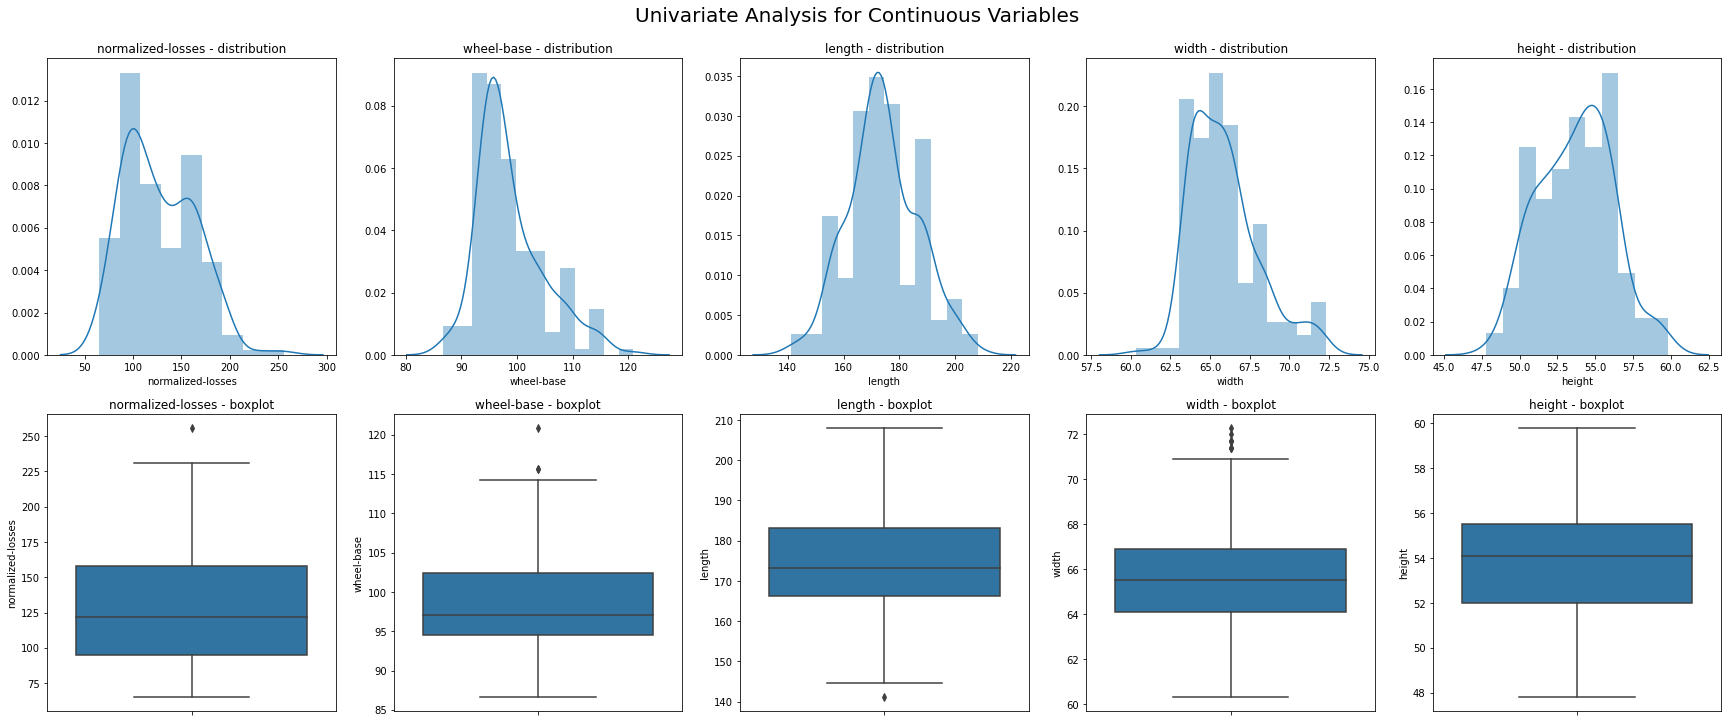

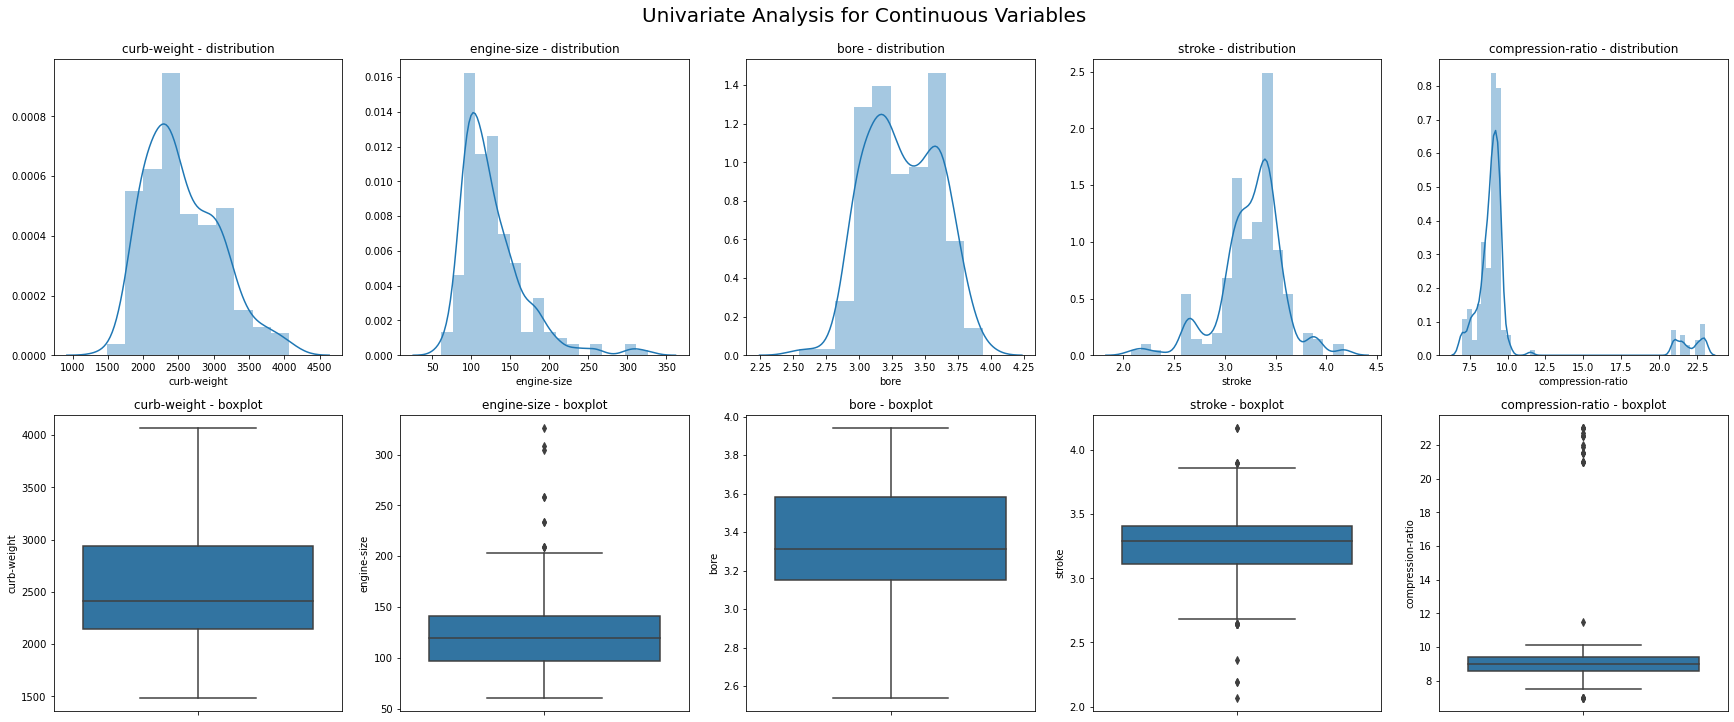

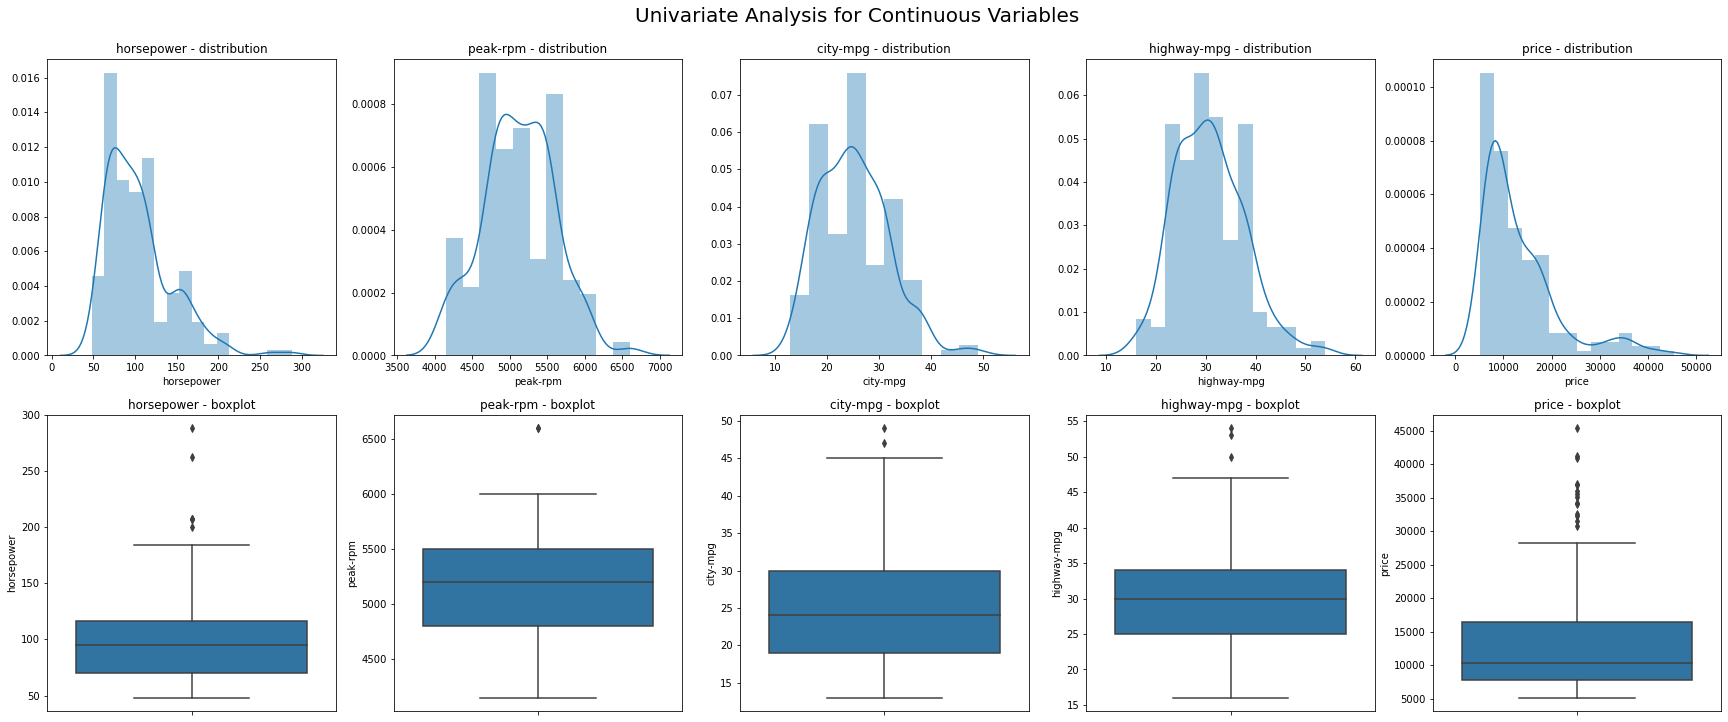

In [8]:
# Write a function display charts for continous variables: displot and boxplot
def plot_univariate_analysis_continuous_variables(df, num_col, size_height=6, size_width=6):
    # Setup chart
    n = len(num_col)
    fig, axes = plt.subplots(2, n, figsize=(size_height*n, size_width*2))
    i = 1

    # Draw displot on first row
    for col in num_col:
        plt.subplot(2, n, i)
        sb.distplot(df[col])
        plt.title(col+ ' - distribution')
        i += 1

    # Draw boxplot with hue on target_col on second row
    for col in num_col:
        plt.subplot(2, n, i)
        sb.boxplot(data=df, y=col)
        plt.title(col+ ' - boxplot')
        i += 1
    fig.suptitle('Univariate Analysis for Continuous Variables', y=0.94, size=20)
    plt.show()

k = int(len(num_col)/3)
plot_univariate_analysis_continuous_variables(df_clean, num_col[:k])
plot_univariate_analysis_continuous_variables(df_clean, num_col[k:k*2])
plot_univariate_analysis_continuous_variables(df_clean, num_col[k*2:])

### Continuous Variables Analysis:
- Most of Variables have good shape

- Some Variables need log-scale for better distribution: engine-size, compression-ratio, horsepower, price

- Some Variables seem have outliers, but maybe not outlier after scale by log

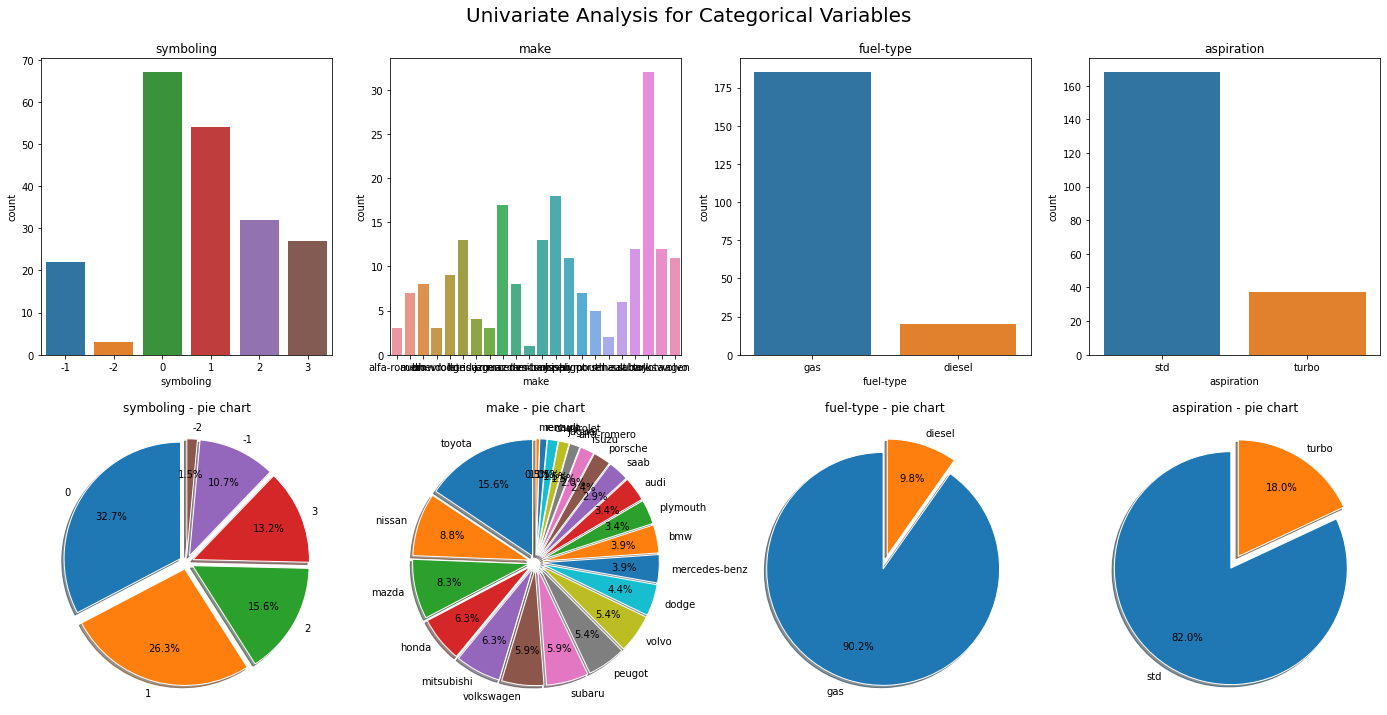

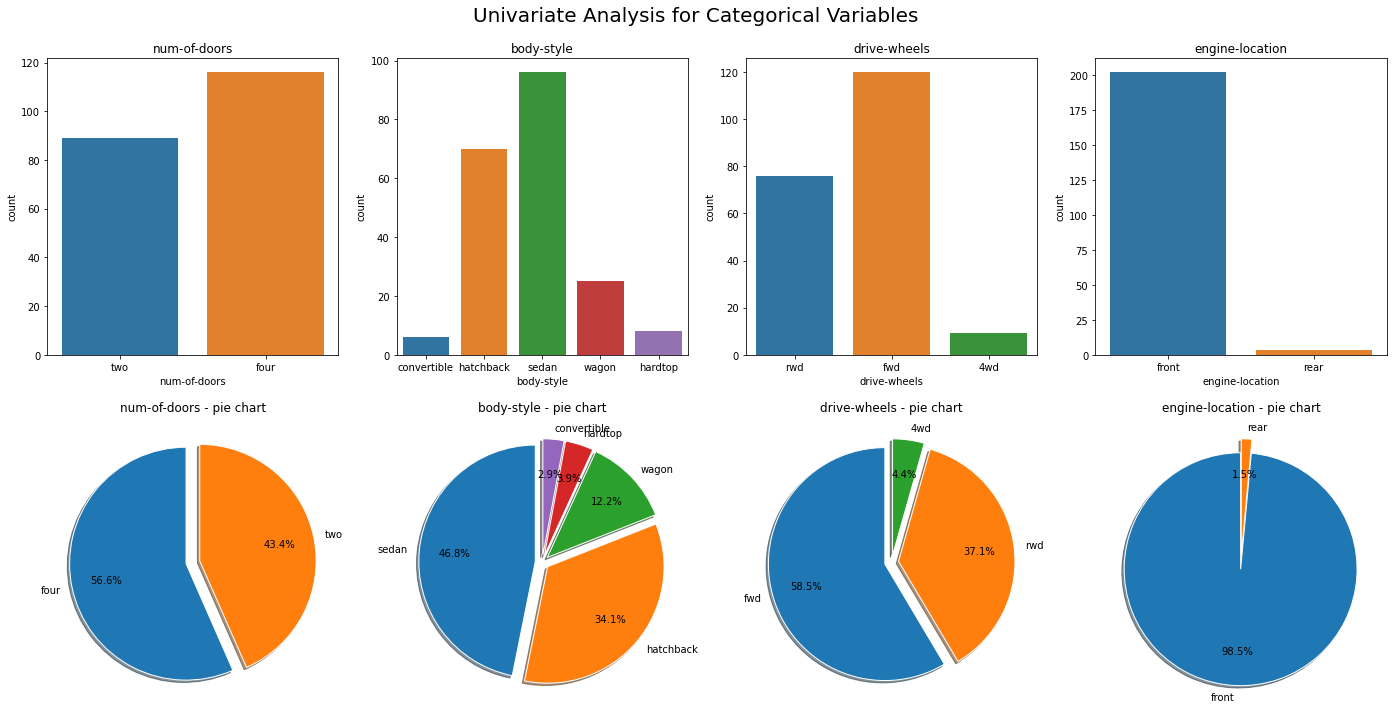

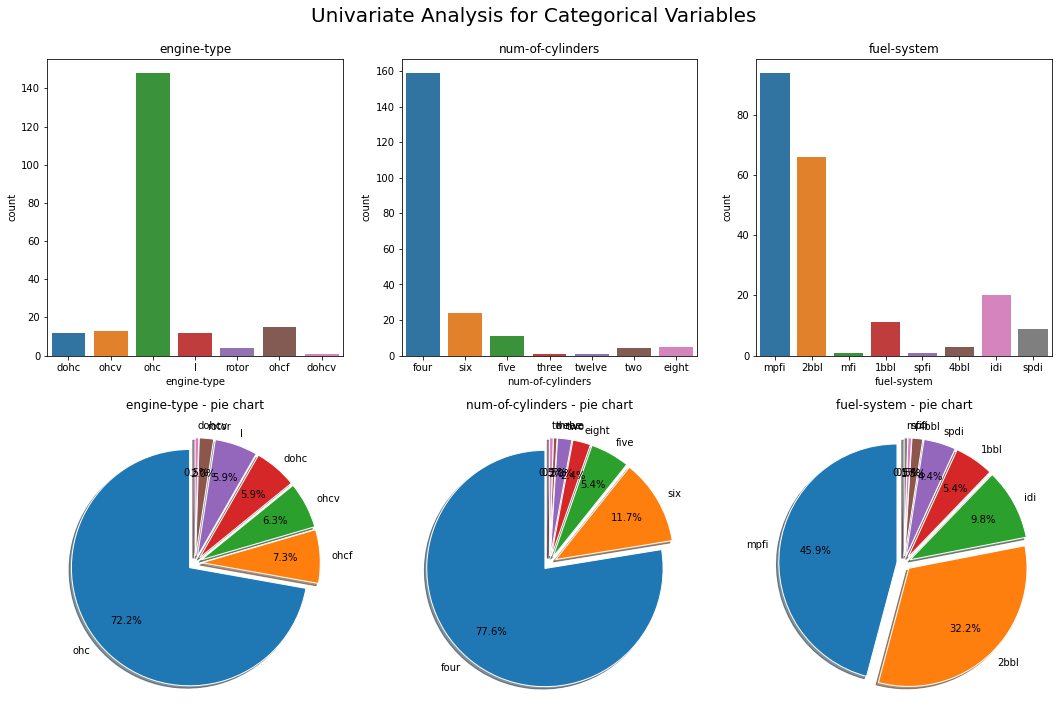

In [9]:
# Write a function display charts for categorical variables: displot and boxplot
def plot_univariate_analysis_categorical_variables(df, cate_col, size_height=6, size_width=6):
    # Setup chart
    n = len(cate_col)
    fig, axes = plt.subplots(2, n, figsize=(size_height*n, size_width*2))
    i = 1

    # Draw displot on first row
    for col in cate_col:
        plt.subplot(2, n, i)
        sb.countplot(df[col])
        plt.title(col)
        i += 1

    # Draw boxplot with hue on target_col on second row
    for col in cate_col:
        plt.subplot(2, n, i)
        data = df[col].value_counts()
        k = len(data.index)
        plt.pie(x=data, startangle=90, autopct="%.1f%%", explode=[0.06]*k, labels=data.index, 
                    pctdistance=0.7, wedgeprops={'edgecolor': 'white'}, shadow=True)
        plt.title(col+ ' - pie chart')
        i += 1
    fig.suptitle('Univariate Analysis for Categorical Variables', y=0.94, size=20)
    plt.show()

k = int(len(cate_col)/3)+1
plot_univariate_analysis_categorical_variables(df_clean, cate_col[:k])
plot_univariate_analysis_categorical_variables(df_clean, cate_col[k:k*2])
plot_univariate_analysis_categorical_variables(df_clean, cate_col[k*2:])

### Categorical Variables Analysis
- Some variables have imbalance in data set like: fuel-type, aspiration, engine-location

- Imbalance but it maybe imbalance real life

- Charts is design beautifull haha 

### Bivariate Analysis

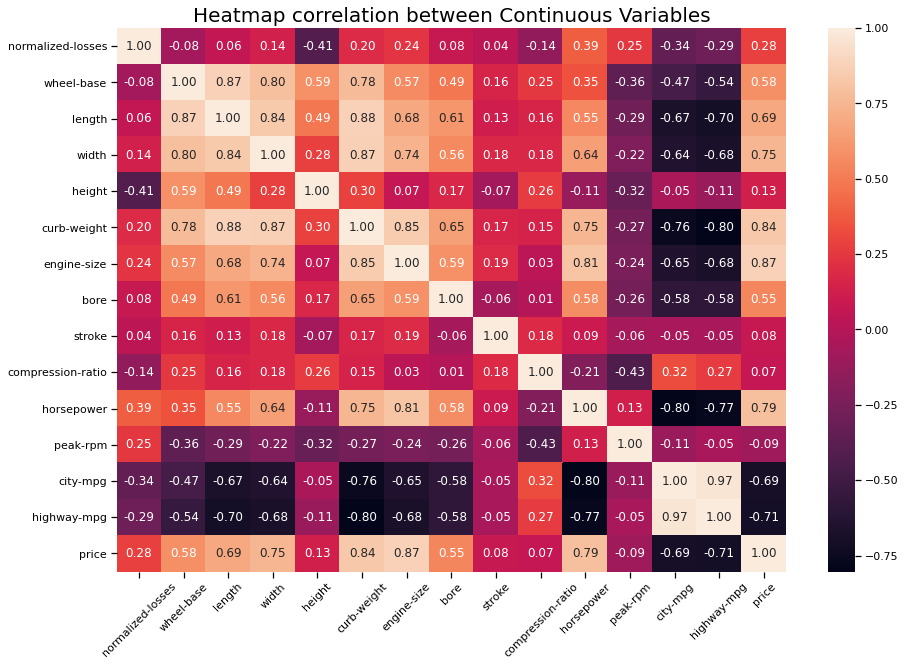

In [10]:
# Draw a correlation heatmap to so how strong correlative between each pair Continuous variables
corr = df_clean.corr()
plt.figure(figsize=(15,10))
sb.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
sb.heatmap(corr, annot=True, fmt='.2f')
plt.xticks(rotation=45)
plt.title('Heatmap correlation between Continuous Variables', size=20)
plt.show()

### Continuous - Continuous vs Price Analysis:
- Seem half first features have low correlation.

- Half second features have higher correlation, better for regression.

- Choose features have high correlation with price to make regression: highway-mpg, city-mpg, horsepower, bore, engine-size, curb-weight, width, length, wheel-base

- Remove features have low correlation with price: peak-rpm, compression-ratio, stroke, height, normalized-losses

#### Bivariate Analysis between Continuous variables - Price

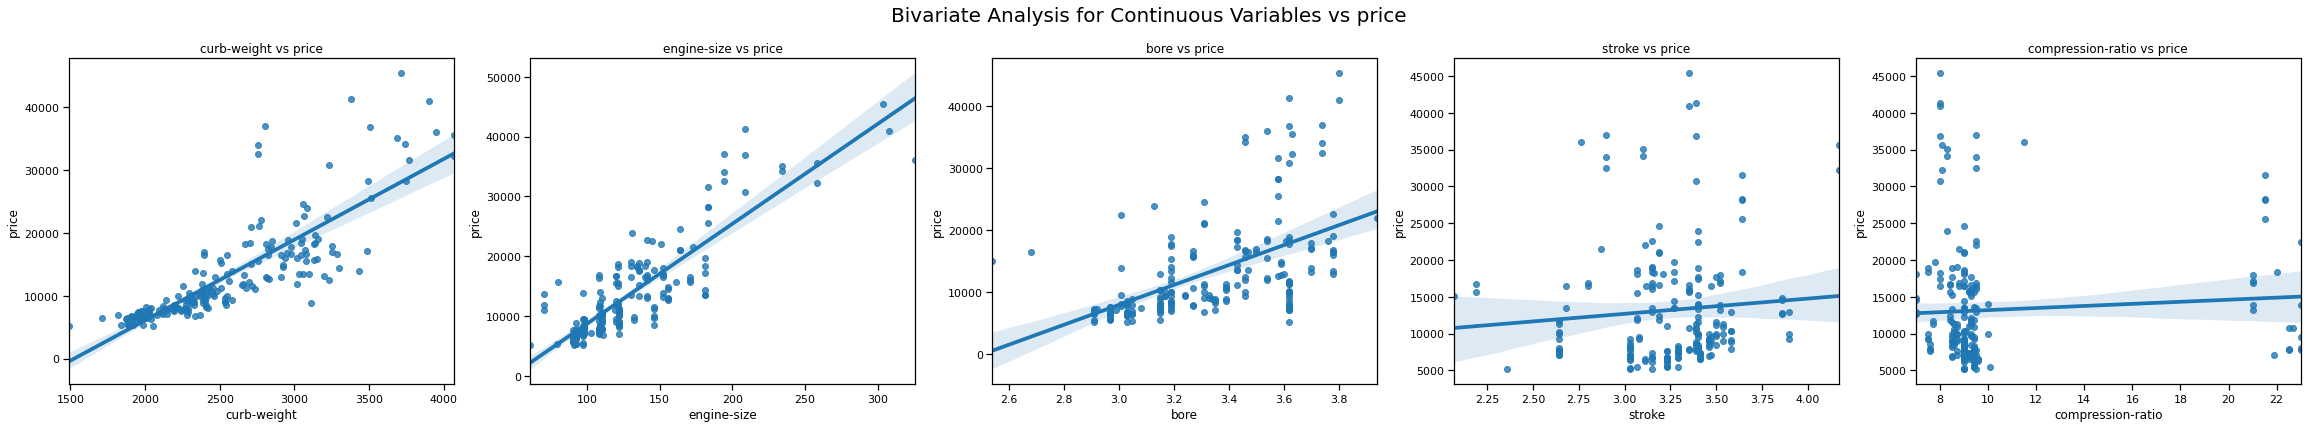

In [11]:
# Write a function display boxplot charts for categorical variables vs price
def plot_bivariate_analysis_continuous_variables(df, num_col, target_col, order=1, size_height=6, size_width=8):
    # Setup chart
    n = len(num_col)
    fig, axes = plt.subplots(1, n, figsize=(size_width*n, size_height*1))
    i = 1

    # Draw function
    for col in num_col:
        plt.subplot(1, n, i)
        sb.regplot(data=df, x=col, y=target_col, order=order)
        plt.title(col + ' vs ' + target_col)
        i += 1

    fig.suptitle('Bivariate Analysis for Continuous Variables vs '+target_col, y=1, size=20)
    plt.show()
k = int(len(num_col)/3)
plot_bivariate_analysis_continuous_variables(df, num_col[:k], target_col, order=1)
plot_bivariate_analysis_continuous_variables(df, num_col[k:k*2], target_col, order=1)
plot_bivariate_analysis_continuous_variables(df, num_col[k*2:], target_col, order=1)

### Linear Analysis:
- Some variables good for linear method: engine-size, horsepower

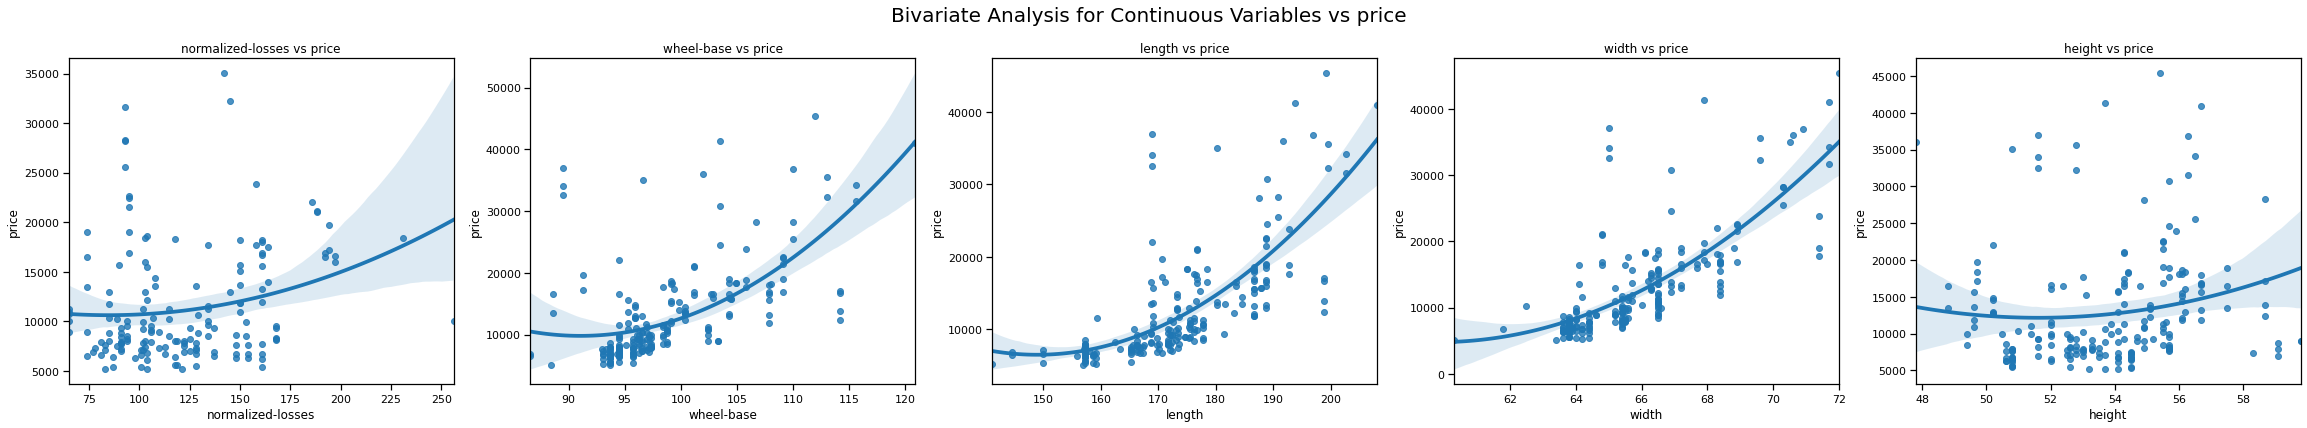

In [12]:
k = int(len(num_col)/3)
plot_bivariate_analysis_continuous_variables(df, num_col[:k], target_col, order=2)
plot_bivariate_analysis_continuous_variables(df, num_col[k:k*2], target_col, order=2)
plot_bivariate_analysis_continuous_variables(df, num_col[k*2:], target_col, order=2)

### Quadratic Analysis:
- Some variable better use Quadratic Regression: wheel-base, length, width, curb-weight, bore, city-mpg, highway-mpg

#### Bivariate Analysis between Categorical variables - Price

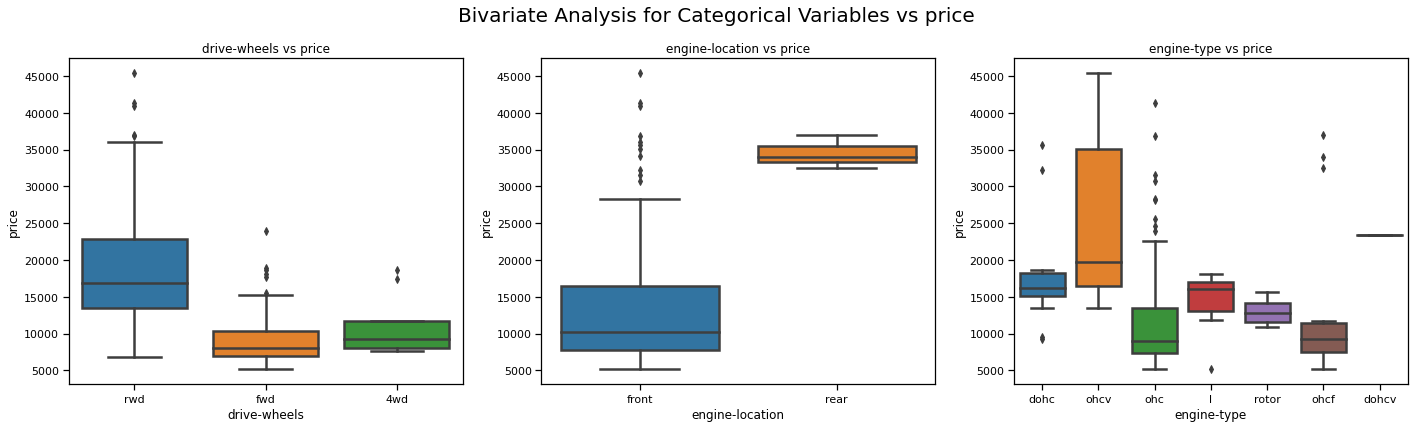

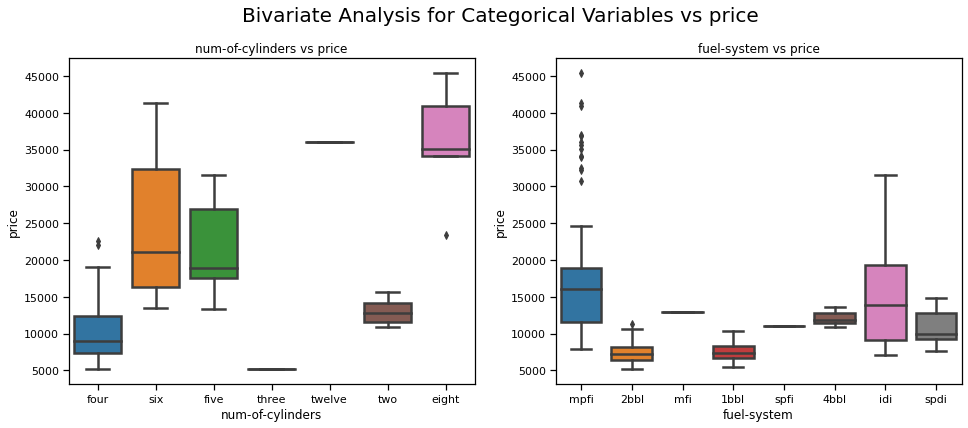

In [13]:
# Write a function display boxplot charts for categorical variables vs price
def plot_bivariate_analysis_categorical_variables(df, cate_col, target_col, size_height=6, size_width=8):
    # Setup chart
    n = len(cate_col)
    fig, axes = plt.subplots(1, n, figsize=(size_width*n, size_height*1))
    i = 1

    # Draw function
    for col in cate_col:
        plt.subplot(1, n, i)
        sb.boxplot(data=df, x=col, y=target_col)
        plt.title(col + ' vs ' + target_col)
        i += 1

    fig.suptitle('Bivariate Analysis for Categorical Variables vs '+target_col, y=1, size=20)
    plt.show()
k = int(len(cate_col)/4) + 1
plot_bivariate_analysis_categorical_variables(df_clean, cate_col[:k], target_col)
plot_bivariate_analysis_categorical_variables(df_clean, cate_col[k:k*2], target_col)
plot_bivariate_analysis_categorical_variables(df_clean, cate_col[k*2:k*3], target_col)
plot_bivariate_analysis_categorical_variables(df_clean, cate_col[k*3:], target_col)

### Check the relation Categorical Variables with Price (Continuous Variables) by Chi-2 test

### Categorical Variables vs Price Analysis:
- Some good categorical variables use for regression price is: engine-location, aspiration, drive-wheels, fuel-type

- Some variables need to remake categorical like: 
    + "make" {luxury_brand: mean > 20000, middle_brand 10000-20000, cheap_brand < 10000}
    
    + "body-style" {style_1: convertible, hardtop, style_2: remaining}

    + "num-of-cylinders" {less_than_4: two, three, four, more_than_5: five, six, eight, twelve}

- Some variables not sensitive with price, we can eliminate: symboling, num-of-doors, engine-type, fuel-system

## Feature Selection through Visualize

In [14]:
# Select on analysis above
df_select_1 = df_clean.copy()

# Get log some features
log_col = ['engine-size', 'horsepower']
for col in log_col:
    df_select_1[col+'_log'] = np.log(df_select_1[col])
    df_select_1.drop(columns=col, inplace=True)

# Drop continuous features have low correlation
drop_col_1 = ['peak-rpm', 'compression-ratio', 'stroke', 'height', 'normalized-losses']
df_select_1.drop(columns=drop_col_1, inplace=True)

# Remake 'make' variable to new 'brand'
avg_price = df.groupby('make').mean()['price'].reset_index()
condition_list = [avg_price['price'] < 10000, (avg_price['price'] >= 10000)&(avg_price['price'] < 20000), (avg_price['price'] >=20000)]
rename_list = ['cheap_brand', 'middle_brand', 'luxury_brand']
avg_price['brand'] = np.select(condition_list, rename_list)
avg_price.drop(columns='price', inplace=True)
df_select_1 = pd.merge(df_select_1, avg_price, on='make', how='left')
df_select_1.drop(columns='make', inplace=True)

# Remake 'body-style' variable
specific_style = df['body-style'].reset_index()
style_1 = (specific_style['body-style'] == 'convertible') | (specific_style['body-style'] == 'hardtop')
condition_style = [style_1, ~style_1]
rename_style = ['style_1', 'style_2']
specific_style['b-style'] = np.select(condition_style, rename_style)
df_select_1 = pd.concat([df_select_1, specific_style['b-style']], axis=1)
df_select_1.drop(columns='body-style', inplace=True)

# Remake 'num-of-cylinders'
cylinders = df['num-of-cylinders'].reset_index()
cyliner_less_4 = (cylinders['num-of-cylinders'] == 'two') | (cylinders['num-of-cylinders'] == 'three') | (cylinders['num-of-cylinders'] == 'four')
condition_cylinder = [cyliner_less_4, ~cyliner_less_4]
rename_cylinder = ['less_than_4', 'more_than_5']
cylinders['cylinder'] = np.select(condition_cylinder, rename_cylinder)
df_select_1 = pd.concat([df_select_1, cylinders['cylinder']], axis=1)
df_select_1.drop(columns='num-of-cylinders', inplace=True)

# Drop categorical features that not sensitive to price
drop_col_2 = ['symboling', 'num-of-doors', 'engine-type', 'fuel-system']
df_select_1.drop(columns=drop_col_2, inplace=True)
df_select_1

fuel-type aspiration drive-wheels engine-location  wheel-base  length  \
0         gas        std          rwd           front        88.6   168.8   
1         gas        std          rwd           front        88.6   168.8   
2         gas        std          rwd           front        94.5   171.2   
3         gas        std          fwd           front        99.8   176.6   
4         gas        std          4wd           front        99.4   176.6   
..        ...        ...          ...             ...         ...     ...   
200       gas        std          rwd           front       109.1   188.8   
201       gas      turbo          rwd           front       109.1   188.8   
202       gas        std          rwd           front       109.1   188.8   
203    diesel      turbo          rwd           front       109.1   188.8   
204       gas      turbo          rwd           front       109.1   188.8   

     width  curb-weight  bore  city-mpg  highway-mpg    price  \
0     64.1       2548.0  3.47      21.0         27.0  13495.0   
1     64.1       2548.0  3.47      21.0         27.0  16500.0   
2     65.5       2823.0  2.68      19.0         26.0  16500.0   
3     66.2       2337.0  3.19      24.0         30.0  13950.0   
4     66.4       2824.0  3.19      18.0         22.0  17450.0   
..     ...          ...   ...       ...          ...      ...   
200   68.9       2952.0  3.78      23.0         28.0  16845.0   
201   68.8       3049.0  3.78      19.0         25.0  19045.0   
202   68.9       3012.0  3.58      18.0         23.0  21485.0   
203   68.9       3217.0  3.01      26.0         27.0  22470.0   
204   68.9       3062.0  3.78      19.0         25.0  22625.0   

     engine-size_log  horsepower_log         brand  b-style     cylinder  
0           4.867534        4.709530  middle_brand  style_1  less_than_4  
1           4.867534        4.709530  middle_brand  style_1  less_than_4  
2           5.023881        5.036953  middle_brand  style_2  more_than_5  
3           4.691348        4.624973  middle_brand  style_2  less_than_4  
4           4.912655        4.744932  middle_brand  style_2  more_than_5  
..               ...             ...           ...      ...          ...  
200         4.948760        4.736198  middle_brand  style_2  less_than_4  
201         4.948760        5.075174  middle_brand  style_2  less_than_4  
202         5.153292        4.897840  middle_brand  style_2  more_than_5  
203         4.976734        4.663439  middle_brand  style_2  more_than_5  
204         4.948760        4.736198  middle_brand  style_2  less_than_4  

[205 rows x 17 columns]

In [15]:
# Convert all categorical to Ordinal encoder and Dummies
df_transform = df_select_1.copy()
dummies_col = ['fuel-type', 'aspiration', 'drive-wheels', 'engine-location', 'brand', 'b-style', 'cylinder']
df_transform = pd.get_dummies(df_transform, columns=dummies_col, drop_first=True)

# Split data to train, test, and then use train data to process Feature selection, then test final model on test set
train, test = train_test_split(df_transform, test_size=0.3, shuffle=True, random_state=3)
X_train_1, y_train = train.drop(columns='price'), train['price']
X_test_1, y_test = test.drop(columns='price'), test['price']

# Standard Scaler for fit_transform for X_train, then transform for X_test
standard_scaler = StandardScaler()
X_train = pd.DataFrame(standard_scaler.fit_transform(X_train_1), columns=X_train_1.columns)
X_test = pd.DataFrame(standard_scaler.transform(X_test_1), columns=X_test_1.columns)

X_train

wheel-base    length     width  curb-weight      bore  city-mpg  \
0     -0.723517 -0.702811 -0.964975    -1.209153 -0.710919  0.907916   
1      0.296930  0.556951  0.532831     0.234650 -0.565408 -0.994385   
2      2.303233  2.163360  2.996965     2.339446  1.653639 -1.787010   
3     -0.377603 -0.381529  0.097984    -0.500232 -0.710919 -0.043234   
4      0.072086  1.098058  0.339566     0.528203  0.707816 -0.994385   
..          ...       ...       ...          ...       ...       ...   
138    1.801658  1.284063  1.499158     0.815765  1.580884 -0.360284   
139   -0.239237 -0.161705 -0.143598    -0.558144 -1.220209  1.859067   
140   -0.446786  0.269489  0.387882    -0.166739  0.416793 -0.360284   
141   -0.515969 -1.260827 -1.061608    -1.055387 -1.074698  0.907916   
142    0.089381  0.413220  1.015995     1.189197  0.307660 -0.994385   

     highway-mpg  engine-size_log  horsepower_log  fuel-type_gas  \
0       0.962034        -0.785332       -1.006421       0.329435   
1      -1.042922         0.461899        0.331792       0.329435   
2      -2.276742         3.430551        1.807971       0.329435   
3       0.036669        -0.321162        0.058309       0.329435   
4      -0.734468         0.030594        1.406938       0.329435   
..           ...              ...             ...            ...   
138    -0.426013         0.595149        0.434282       0.329435   
139     2.350081        -0.785332       -1.818068      -3.035504   
140     0.036669         0.351722        0.624184       0.329435   
141     1.116261        -0.980649       -1.313367       0.329435   
142    -0.888695         1.516840        1.406938       0.329435   

     aspiration_turbo  drive-wheels_fwd  drive-wheels_rwd  \
0           -0.515254          0.925820         -0.838082   
1           -0.515254          0.925820         -0.838082   
2           -0.515254         -1.080123          1.193201   
3           -0.515254          0.925820         -0.838082   
4            1.940790          0.925820         -0.838082   
..                ...               ...               ...   
138         -0.515254         -1.080123          1.193201   
139         -0.515254          0.925820         -0.838082   
140         -0.515254          0.925820         -0.838082   
141         -0.515254          0.925820         -0.838082   
142         -0.515254         -1.080123          1.193201   

     engine-location_rear  brand_luxury_brand  brand_middle_brand  \
0               -0.146385           -0.316228            1.143001   
1               -0.146385           -0.316228            1.143001   
2               -0.146385            3.162278           -0.874890   
3               -0.146385           -0.316228           -0.874890   
4               -0.146385           -0.316228            1.143001   
..                    ...                 ...                 ...   
138             -0.146385           -0.316228            1.143001   
139             -0.146385           -0.316228            1.143001   
140             -0.146385           -0.316228           -0.874890   
141             -0.146385           -0.316228           -0.874890   
142             -0.146385           -0.316228            1.143001   

     b-style_style_2  cylinder_more_than_5  
0           0.302660             -0.449089  
1           0.302660              2.226732  
2          -3.304038              2.226732  
3           0.302660             -0.449089  
4           0.302660             -0.449089  
..               ...                   ...  
138         0.302660             -0.449089  
139         0.302660             -0.449089  
140         0.302660             -0.449089  
141         0.302660             -0.449089  
142         0.302660              2.226732  

[143 rows x 18 columns]

## Perform Best subset selection

In [16]:
def process_subset(feature_set, X, y, model, score_metrics):
    # Fit model using cross-val, get score
    result = cross_validate(model, X[list(feature_set)], y, cv=5, scoring=score_metrics)
    result.pop('fit_time')
    result.pop('score_time')

    for s in score_metrics:
        result[s] = result.pop('test_'+s).mean()
    result['feature'] = feature_set

    # Return dict include model and useful information 
    return result

def get_best_subset(k, X, y, features_limit, model, score_metrics):
    # Want to create list of models with k predictors 
    results = []
    
    # Start counting time
    tic = time.time()
    
    # Process combinations features to create model & retult
    for feature_set in itertools.combinations(features_limit, k):
        results.append(process_subset(feature_set, X, y, model, score_metrics))
    
    # Wrap result up in a nice dataframe
    results_df = pd.DataFrame(results)
    
    # Choose the model with the highest score
    best_model = results_df.loc[results_df[score_metrics[0]].argmax()]
    
    toc = time.time()
    print("Processed {:5} models on {:2} features in {:6.2f} seconds.".format(results_df.shape[0], k, (toc-tic)))
    
    # Return the best model
    return best_model

def best_subset_selection(X, y, features_limit, model, score_metrics):
    models_best = pd.DataFrame(columns=['feature'] + score_metrics)
    n = len(features_limit) + 1

    tic = time.time()
    for i in range(1,n):
        models_best.loc[i] = get_best_subset(i, X, y, features_limit, model, score_metrics)

    toc = time.time()
    print("Total elapsed time: {:.2f} seconds.".format((toc-tic)))
    return models_best

model = LinearRegression()
score_metrics = ['neg_mean_squared_error', 'r2']

### Best subset selection using Forward Stepwise

In [17]:
# Perform Forward Stepwise Selection
def forward_stepwise(feature_set, X, y, model, score_metrics):
    # Pull out predictors we still need to process
    remaining_features = [p for p in X.columns if p not in feature_set]
    tic = time.time()
    results = []
    for p in remaining_features:
        results.append(process_subset(feature_set + [p], X, y, model, score_metrics))
    # Wrap result up in a dataframe
    results_df = pd.DataFrame(results)
    # Choose model with the highest score
    best_model = results_df.loc[results_df[score_metrics[0]].argmax()]
    toc = time.time()
    print('Processed {:3} models on {:2} features in {:6.2f} seconds.'.format(results_df.shape[0], len(feature_set)+1, (toc-tic)))
    return best_model

def best_forward_model(X, y, model, score_metrics):
    models_fwd = pd.DataFrame(columns=['feature'] + score_metrics)
    tic = time.time()
    feature_set = []
    n = len(X.columns)+1
    for i in range(1, n):
        models_fwd.loc[i] = forward_stepwise(feature_set, X, y, model, score_metrics)
        feature_set = models_fwd.loc[i]['feature']
    toc = time.time()
    print('Total elapsed time: {:.2f} seconds.'.format(toc-tic))
    return models_fwd

In [18]:
model = LinearRegression()
score_metrics = ['neg_mean_squared_error', 'r2']
models_fwd = best_forward_model(X_train, y_train, model, score_metrics)

Processed  18 models on  1 features in   0.41 seconds.
Processed  17 models on  2 features in   0.32 seconds.
Processed  16 models on  3 features in   0.30 seconds.
Processed  15 models on  4 features in   0.33 seconds.
Processed  14 models on  5 features in   0.30 seconds.
Processed  13 models on  6 features in   0.28 seconds.
Processed  12 models on  7 features in   0.25 seconds.
Processed  11 models on  8 features in   0.22 seconds.
Processed  10 models on  9 features in   0.21 seconds.
Processed   9 models on 10 features in   0.23 seconds.
Processed   8 models on 11 features in   0.17 seconds.
Processed   7 models on 12 features in   0.16 seconds.
Processed   6 models on 13 features in   0.13 seconds.
Processed   5 models on 14 features in   0.10 seconds.
Processed   4 models on 15 features in   0.10 seconds.
Processed   3 models on 16 features in   0.08 seconds.
Processed   2 models on 17 features in   0.05 seconds.
Processed   1 models on 18 features in   0.03 seconds.
Total elap

In [19]:
models_fwd['mse'] = - models_fwd['neg_mean_squared_error']
models_fwd.sort_values(by='mse', ascending=True).iloc[:5]

feature  neg_mean_squared_error  \
9   [engine-size_log, brand_luxury_brand, curb-wei...           -6.522480e+06   
10  [engine-size_log, brand_luxury_brand, curb-wei...           -6.537162e+06   
8   [engine-size_log, brand_luxury_brand, curb-wei...           -6.538421e+06   
12  [engine-size_log, brand_luxury_brand, curb-wei...           -6.619416e+06   
11  [engine-size_log, brand_luxury_brand, curb-wei...           -6.621932e+06   

          r2           mse  
9   0.876045  6.522480e+06  
10  0.875822  6.537162e+06  
8   0.875472  6.538421e+06  
12  0.875037  6.619416e+06  
11  0.874552  6.621932e+06

### Best subset selection using Backward Stepwise

In [20]:
# Perform Backward Stepwise selection
def backward_stepwise(feature_set, i, X, y, model, score_metrics):
    tic = time.time()
    results = []
    for p in itertools.combinations(feature_set, i):
        results.append(process_subset(p, X, y, model, score_metrics))
    results_df = pd.DataFrame(results)
    best_model = results_df.loc[results_df[score_metrics[0]].argmax()]
    toc = time.time()
    print('Processed {:3} models on {:2} features in {:5.2f} seconds.'.format(results_df.shape[0], i, (toc-tic)))
    return best_model

def best_backward_model(X, y, model, score_metrics):
    models_bwd = pd.DataFrame(columns=['feature'] + score_metrics)
    tic = time.time()
    feature_set = X.columns
    n = len(X.columns)+1
    for i in range(len(X.columns), 0, -1):
        models_bwd.loc[i] = backward_stepwise(feature_set, i, X, y, model, score_metrics)
        feature_set = models_bwd.loc[i]['feature']
    toc = time.time()
    print('Total elapsed time: {:.2f} seconds.'.format(toc-tic))
    return models_bwd

In [21]:
models_bwd = best_backward_model(X_train, y_train, model, score_metrics)

Processed   1 models on 18 features in  0.05 seconds.
Processed  18 models on 17 features in  0.53 seconds.
Processed  17 models on 16 features in  0.48 seconds.
Processed  16 models on 15 features in  0.40 seconds.
Processed  15 models on 14 features in  0.32 seconds.
Processed  14 models on 13 features in  0.32 seconds.
Processed  13 models on 12 features in  0.27 seconds.
Processed  12 models on 11 features in  0.26 seconds.
Processed  11 models on 10 features in  0.26 seconds.
Processed  10 models on  9 features in  0.22 seconds.
Processed   9 models on  8 features in  0.21 seconds.
Processed   8 models on  7 features in  0.16 seconds.
Processed   7 models on  6 features in  0.14 seconds.
Processed   6 models on  5 features in  0.11 seconds.
Processed   5 models on  4 features in  0.09 seconds.
Processed   4 models on  3 features in  0.08 seconds.
Processed   3 models on  2 features in  0.07 seconds.
Processed   2 models on  1 features in  0.04 seconds.
Total elapsed time: 4.07 sec

In [22]:
models_bwd['mse'] = - models_bwd['neg_mean_squared_error']
models_bwd.sort_values(by='mse', ascending=True).iloc[:5]

feature  neg_mean_squared_error  \
8   (curb-weight, engine-size_log, fuel-type_gas, ...           -6.538421e+06   
10  (curb-weight, engine-size_log, fuel-type_gas, ...           -6.598868e+06   
11  (wheel-base, curb-weight, engine-size_log, fue...           -6.610037e+06   
9   (curb-weight, engine-size_log, fuel-type_gas, ...           -6.617863e+06   
12  (wheel-base, length, curb-weight, engine-size_...           -6.619416e+06   

          r2           mse  
8   0.875472  6.538421e+06  
10  0.875286  6.598868e+06  
11  0.875229  6.610037e+06  
9   0.874236  6.617863e+06  
12  0.875037  6.619416e+06

In [23]:
plt.figure(figsize=(16,6))
models_best_subset = [(models_fwd, 'Forward Stepwise method'), (models_bwd, 'Backward Stepwise method')]

i = 1
for models_list in models_best_subset:
    models, name = models_list
    models_visual = models[models['r2']>0]
    plt.subplot(1,2,i)
    sb.lineplot(x=models_visual.index, y=models_visual['mse'], label=name)
    x_min = models_visual[models_visual['mse'] == models_visual['mse'].min()].index[0]
    features = models_visual.loc[x_min, 'feature']
    plt.plot(x_min, models_visual.loc[x_min, 'mse'], 'ro', label='Min mse')
    plt.title('Test Mean Squared Error using cross-validation')
    plt.xlabel('Number of features')
    plt.xticks(models_visual.index)

i += 1

for models_list in models_best_subset:
    models, name = models_list
    models_visual = models[models['r2']>0]
    plt.subplot(1,2,i)
    sb.lineplot(x=models_visual.index, y=models_visual['r2'], label=name)
    x_max = models_visual[models_visual['r2'] == models_visual['r2'].max()].index[0]
    features = models_visual.loc[x_max, 'feature']
    plt.plot(x_max, models_visual.loc[x_max, 'r2'], 'ro', label='Max R2')
    plt.title('Test R2 using cross-validation')    
    plt.xlabel('Number of features')
    plt.xticks(models_visual.index)

plt.show()

In [24]:
full_features = X_train.columns
fwd_top_12_features = models_fwd.loc[12]['feature']
bwd_top_12_features = models_bwd.loc[12]['feature']
diff_top_12_fwd_bwd = np.setdiff1d(fwd_top_12_features, bwd_top_12_features)
fwd_weak_features = np.setdiff1d(full_features, fwd_top_12_features)
bwd_weak_features = np.setdiff1d(full_features, bwd_top_12_features)

print('Top 12 features from Forward Stepwise Method: ', fwd_top_12_features)
print('')
print('Top 12 features from Backward Stepwise Method: ', bwd_top_12_features)
print('')
print('Difference top 12 of FWD and BWD: ', diff_top_12_fwd_bwd)
print('')
print('Top weak features from Forward Stepwise Method: ', fwd_weak_features)
print('')
print('Top weak features from Backward Stepwise Method: ', bwd_weak_features)
# bwd_weak_features

Top 12 features from Forward Stepwise Method:  ['engine-size_log', 'brand_luxury_brand', 'curb-weight', 'engine-location_rear', 'brand_middle_brand', 'cylinder_more_than_5', 'aspiration_turbo', 'fuel-type_gas', 'wheel-base', 'length', 'drive-wheels_fwd', 'drive-wheels_rwd']

Top 12 features from Backward Stepwise Method:  ('wheel-base', 'length', 'curb-weight', 'engine-size_log', 'fuel-type_gas', 'aspiration_turbo', 'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-location_rear', 'brand_luxury_brand', 'brand_middle_brand', 'cylinder_more_than_5')

Difference top 12 of FWD and BWD:  []

Top weak features from Forward Stepwise Method:  ['b-style_style_2' 'bore' 'city-mpg' 'highway-mpg' 'horsepower_log'
 'width']

Top weak features from Backward Stepwise Method:  ['b-style_style_2' 'bore' 'city-mpg' 'highway-mpg' 'horsepower_log'
 'width']


## Result from Forward and Backward Stepwise method:
- MSE drop significantly from 1 to 5 number of features, indicate top 5 features have most power for prediction

- Curve MSE after stable from 5-12 features, it start incease back, indicate more than 12 features, model will over-fitting

- Features added from 12 features seem no impact to prediction, 

- Top 12 features from FWD and BWD is same and weak features remaining also same

--> Consider to other method Lasso for more info about best selection of features in all 18 features

If same result 6 weak features, consider to eliminate and re-calculate best features set for model

## Perform Lasso for Feature Selection

In [25]:
# Alphas range set-up
alphas = np.logspace(4, -2, 50)

# Run Lasso CV to calculate mse and identify best alpha
lassocv = LassoCV(alphas= alphas, cv=5).fit(X_train, y_train)
mse_lasso_cv = lassocv.mse_path_.mean(axis=1)

# Best alpha
optimal_alpha_lasso_cv = lassocv.alpha_

# Best MSE
optimal_mse_lasso_cv = mse_lasso_cv.min()

lasso_model = Lasso(normalize= True)

In [26]:
# Create Function result coefs Ridge or Lasso due to change of alpha (lamda)
def result_model(model, alphas, X, y):
    coefs = []

    # Run all model on range alphas
    for a in alphas:
        model.set_params(alpha = a)
        model.fit(X, y)
        coefs.append(model.coef_)

    # Wrap in data frame with Collums names
    results = pd.DataFrame(coefs, columns=X.columns)
    
    return results
result_lasso = result_model(lasso_model, alphas, X_train, y_train)

In [27]:
# Function visualize all coef of Result get above
def display_model(result_model, model, alphas, optimal_alpha, X, y):

    # Create threshold k where reduce significant coef beta
    optimal_coef = model.set_params(alpha = optimal_alpha).fit(X, y).coef_
    n_optimal_coef = np.sum(optimal_coef != 0)

    # Draw all feature coef of model
    for i in range(len(result_model.columns)):
        label = '{}  : {:.2f}'.format(result_model.columns[i], optimal_coef[i]) if np.abs(optimal_coef[i])> 0 else ''
        plt.plot(alphas, result_model.iloc[:,i], linewidth=3, label=label)
        # plt.plot(alphas, result_model.iloc[:,i], linewidth=3)

    # Draw a vertical line at threshold k
    plt.axvline(x=optimal_alpha, linestyle='--', linewidth=2, label='Optimal alpha : {:.4f}, n_features : {:d}'.format(optimal_alpha, n_optimal_coef))

    # Scale in log for easier to see, set x,ylabel, legend
    plt.xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('Standardized Coef')
    plt.legend()

# Function display mse of model for easier to see range set alphas and optimal point good or not
def display_mse(mse_result, alphas, optimal_alpha=0, optimal_mse=0, scale_display='ticks'):

    # Plot MSE line
    plt.plot(alphas, mse_result, label='MSE')

    # Plot Min point
    plt.scatter(alphas[mse_result.argmin()], mse_result.min(), label='Min MSE: {:,.0f} at alpha: {:.4f}'.format(mse_result.min(), alphas[mse_result.argmin()]))
    
    # Plot Optimal point
    if optimal_alpha != 0:
        plt.scatter(optimal_alpha, optimal_mse, label='Optimal MSE: {:,.0f} at alpha: {:.4f}'.format(optimal_mse, optimal_alpha))

    if scale_display == 'log':      
        plt.xscale('log')
    if scale_display == 'ticks':
        plt.xticks(alphas)
    
    plt.xlabel('alpha')
    plt.ylabel('Mean Squared Error')
    plt.legend()

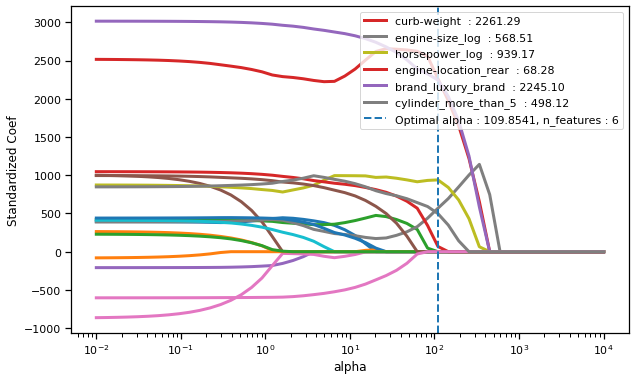

In [28]:
plt.figure(figsize=(10, 6))
display_model(result_lasso, lasso_model, alphas, optimal_alpha_lasso_cv, X_train, y_train)

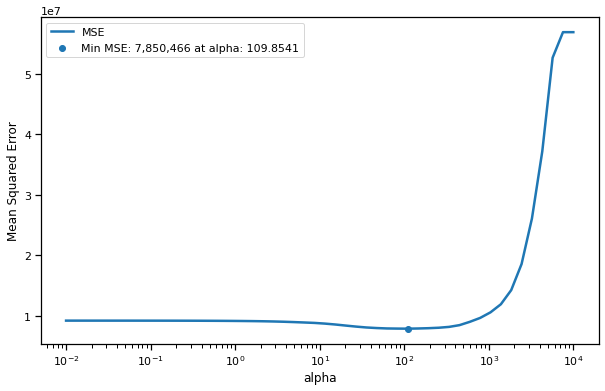

In [29]:
plt.figure(figsize=(10, 6))
display_mse(mse_lasso_cv, alphas, scale_display='log')

### Perform Lasso method:
- Number features optimal suggest by Lasso method is 6, but MSE still higher than Best subset selection method

- We can see 5 features have non-zero coef also in top 12 features, only horsepower_log is not

- Suggest add horsepower to 12 features, total strong features is 13

## Perform Best subset selection on 13 features instead of 18 features

In [30]:
features_limit = fwd_top_12_features + ['horsepower_log']
models_best = best_subset_selection(X_train, y_train, features_limit, model, score_metrics)

Processed    13 models on  1 features in   0.30 seconds.
Processed    78 models on  2 features in   1.50 seconds.
Processed   286 models on  3 features in   5.45 seconds.
Processed   715 models on  4 features in  13.59 seconds.
Processed  1287 models on  5 features in  26.55 seconds.
Processed  1716 models on  6 features in  37.76 seconds.
Processed  1716 models on  7 features in  40.04 seconds.
Processed  1287 models on  8 features in  29.82 seconds.
Processed   715 models on  9 features in  18.40 seconds.
Processed   286 models on 10 features in   7.98 seconds.
Processed    78 models on 11 features in   1.84 seconds.
Processed    13 models on 12 features in   0.35 seconds.
Processed     1 models on 13 features in   0.03 seconds.
Total elapsed time: 183.65 seconds.


In [31]:
models_best['mse'] = - models_best['neg_mean_squared_error']
display(models_best.sort_values(by='mse', ascending=True).iloc[:5])
features_selected = list(models_best.sort_values(by='mse', ascending=True).iloc[0]['feature'])
print('')
print('Number of features selected: ', len(features_selected))
print('')
print('Features: ', features_selected)

feature  neg_mean_squared_error  \
9   (engine-size_log, brand_luxury_brand, curb-wei...           -6.522480e+06   
10  (engine-size_log, brand_luxury_brand, curb-wei...           -6.537162e+06   
8   (engine-size_log, brand_luxury_brand, curb-wei...           -6.538421e+06   
11  (engine-size_log, brand_luxury_brand, curb-wei...           -6.610037e+06   
12  (engine-size_log, brand_luxury_brand, curb-wei...           -6.619416e+06   

          r2           mse  
9   0.876045  6.522480e+06  
10  0.875822  6.537162e+06  
8   0.875472  6.538421e+06  
11  0.875229  6.610037e+06  
12  0.875037  6.619416e+06


Number of features selected:  9

Features:  ['engine-size_log', 'brand_luxury_brand', 'curb-weight', 'engine-location_rear', 'brand_middle_brand', 'cylinder_more_than_5', 'aspiration_turbo', 'fuel-type_gas', 'wheel-base']


## Run Linear Regression model on Test set

In [32]:
linear_model = LinearRegression()
linear_model.fit(X_train[features_selected], y_train)
y_pred = linear_model.predict(X_test[features_selected])
test_mse_linear = mean_squared_error(y_test, y_pred)
test_r2_linear = r2_score(y_test, y_pred)
print('')
print('Test MSE: {:,.0f}.\n'.format(test_mse_linear))
print('Test R2 : {:.4f}.\n'.format(test_r2_linear))


Test MSE: 6,009,335.

Test R2 : 0.9212.



In [33]:
plt.figure(figsize=(10,6))
sb.kdeplot(y_test, label='Actual Price')
sb.kdeplot(y_pred, label='Predicted Price')
plt.xlabel('Price')
plt.ylabel('Proportion')
plt.title('Distribution between Prediction and Actual result')
plt.show()

### Linear Regression have good result on test set: 92% on test-r2 and 6mil on test-mse, better than train score

## Try more than Linear: Quadratic Regression

In [34]:
poly_2 = PolynomialFeatures(degree=2)
X_train_poly = poly_2.fit_transform(X_train[features_selected])
X_test_poly = poly_2.fit_transform(X_test[features_selected])
poly_col_name = poly_2.get_feature_names(X_train[features_selected].columns)
X_train_poly = pd.DataFrame(X_train_poly, columns=poly_col_name)
X_test_poly = pd.DataFrame(X_test_poly, columns=poly_col_name)
X_train_poly

1  engine-size_log  brand_luxury_brand  curb-weight  \
0    1.0        -0.785332           -0.316228    -1.209153   
1    1.0         0.461899           -0.316228     0.234650   
2    1.0         3.430551            3.162278     2.339446   
3    1.0        -0.321162           -0.316228    -0.500232   
4    1.0         0.030594           -0.316228     0.528203   
..   ...              ...                 ...          ...   
138  1.0         0.595149           -0.316228     0.815765   
139  1.0        -0.785332           -0.316228    -0.558144   
140  1.0         0.351722           -0.316228    -0.166739   
141  1.0        -0.980649           -0.316228    -1.055387   
142  1.0         1.516840           -0.316228     1.189197   

     engine-location_rear  brand_middle_brand  cylinder_more_than_5  \
0               -0.146385            1.143001             -0.449089   
1               -0.146385            1.143001              2.226732   
2               -0.146385           -0.874890              2.226732   
3               -0.146385           -0.874890             -0.449089   
4               -0.146385            1.143001             -0.449089   
..                    ...                 ...                   ...   
138             -0.146385            1.143001             -0.449089   
139             -0.146385            1.143001             -0.449089   
140             -0.146385           -0.874890             -0.449089   
141             -0.146385           -0.874890             -0.449089   
142             -0.146385            1.143001              2.226732   

     aspiration_turbo  fuel-type_gas  wheel-base  ...  cylinder_more_than_5^2  \
0           -0.515254       0.329435   -0.723517  ...                0.201681   
1           -0.515254       0.329435    0.296930  ...                4.958333   
2           -0.515254       0.329435    2.303233  ...                4.958333   
3           -0.515254       0.329435   -0.377603  ...                0.201681   
4            1.940790       0.329435    0.072086  ...                0.201681   
..                ...            ...         ...  ...                     ...   
138         -0.515254       0.329435    1.801658  ...                0.201681   
139         -0.515254      -3.035504   -0.239237  ...                0.201681   
140         -0.515254       0.329435   -0.446786  ...                0.201681   
141         -0.515254       0.329435   -0.515969  ...                0.201681   
142         -0.515254       0.329435    0.089381  ...                4.958333   

     cylinder_more_than_5 aspiration_turbo  \
0                                 0.231395   
1                                -1.147332   
2                                -1.147332   
3                                 0.231395   
4                                -0.871587   
..                                     ...   
138                               0.231395   
139                               0.231395   
140                               0.231395   
141                               0.231395   
142                              -1.147332   

     cylinder_more_than_5 fuel-type_gas  cylinder_more_than_5 wheel-base  \
0                             -0.147945                         0.324924   
1                              0.733562                         0.661183   
2                              0.733562                         5.128683   
3                             -0.147945                         0.169577   
4                             -0.147945                        -0.032373   
..                                  ...                              ...   
138                           -0.147945                        -0.809104   
139                            1.363211                         0.107439   
140                           -0.147945                         0.200647   
141                           -0.147945                         0.231716   
142                            0.733562        

In [35]:
models_fwd_poly = best_forward_model(X_train_poly, y_train, model, score_metrics)
models_fwd_poly['mse'] = - models_fwd_poly['neg_mean_squared_error']
models_fwd_poly.sort_values(by='mse', ascending=True).iloc[:5]

Processed  55 models on  1 features in   1.24 seconds.
Processed  54 models on  2 features in   1.23 seconds.
Processed  53 models on  3 features in   1.19 seconds.
Processed  52 models on  4 features in   1.20 seconds.
Processed  51 models on  5 features in   1.17 seconds.
Processed  50 models on  6 features in   1.09 seconds.
Processed  49 models on  7 features in   1.22 seconds.
Processed  48 models on  8 features in   1.21 seconds.
Processed  47 models on  9 features in   1.17 seconds.
Processed  46 models on 10 features in   1.19 seconds.
Processed  45 models on 11 features in   0.97 seconds.
Processed  44 models on 12 features in   0.98 seconds.
Processed  43 models on 13 features in   0.93 seconds.
Processed  42 models on 14 features in   0.93 seconds.
Processed  41 models on 15 features in   0.95 seconds.
Processed  40 models on 16 features in   0.90 seconds.
Processed  39 models on 17 features in   0.91 seconds.
Processed  38 models on 18 features in   0.87 seconds.
Processed 

feature  neg_mean_squared_error  \
24  [engine-size_log, brand_luxury_brand brand_mid...           -4.526512e+06   
14  [engine-size_log, brand_luxury_brand brand_mid...           -4.541699e+06   
13  [engine-size_log, brand_luxury_brand brand_mid...           -4.541699e+06   
16  [engine-size_log, brand_luxury_brand brand_mid...           -4.541699e+06   
12  [engine-size_log, brand_luxury_brand brand_mid...           -4.541699e+06   

          r2           mse  
24  0.907026  4.526512e+06  
14  0.909218  4.541699e+06  
13  0.909218  4.541699e+06  
16  0.909218  4.541699e+06  
12  0.909218  4.541699e+06

In [36]:
models_bwd_poly = best_backward_model(X_train_poly, y_train, model, score_metrics)
models_bwd_poly['mse'] = - models_bwd_poly['neg_mean_squared_error']
models_bwd_poly.sort_values(by='mse', ascending=True).iloc[:5]

Processed   1 models on 55 features in  0.03 seconds.
Processed  55 models on 54 features in  1.72 seconds.
Processed  54 models on 53 features in  1.47 seconds.
Processed  53 models on 52 features in  1.45 seconds.
Processed  52 models on 51 features in  1.47 seconds.
Processed  51 models on 50 features in  1.40 seconds.
Processed  50 models on 49 features in  1.41 seconds.
Processed  49 models on 48 features in  1.39 seconds.
Processed  48 models on 47 features in  1.30 seconds.
Processed  47 models on 46 features in  1.30 seconds.
Processed  46 models on 45 features in  1.23 seconds.
Processed  45 models on 44 features in  1.23 seconds.
Processed  44 models on 43 features in  1.18 seconds.
Processed  43 models on 42 features in  1.15 seconds.
Processed  42 models on 41 features in  1.12 seconds.
Processed  41 models on 40 features in  1.08 seconds.
Processed  40 models on 39 features in  1.06 seconds.
Processed  39 models on 38 features in  1.02 seconds.
Processed  38 models on 37 f

feature  neg_mean_squared_error  \
13  (brand_luxury_brand, curb-weight, aspiration_t...           -4.092020e+06   
19  (engine-size_log, brand_luxury_brand, curb-wei...           -4.093185e+06   
14  (brand_luxury_brand, curb-weight, aspiration_t...           -4.093458e+06   
23  (engine-size_log, brand_luxury_brand, curb-wei...           -4.094427e+06   
21  (engine-size_log, brand_luxury_brand, curb-wei...           -4.097305e+06   

          r2           mse  
13  0.919410  4.092020e+06  
19  0.919137  4.093185e+06  
14  0.919386  4.093458e+06  
23  0.918992  4.094427e+06  
21  0.919001  4.097305e+06

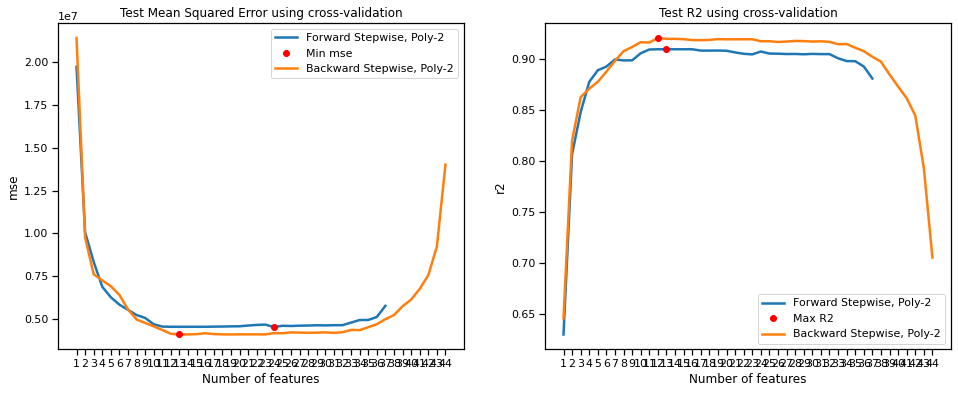

In [37]:
plt.figure(figsize=(16,6))
models_best_subset_poly = [(models_fwd_poly, 'Forward Stepwise, Poly-2'), (models_bwd_poly, 'Backward Stepwise, Poly-2')]

i = 1
for models_list in models_best_subset_poly:
    models, name = models_list
    models_visual = models[models['r2']>0.5]
    plt.subplot(1,2,i)
    sb.lineplot(x=models_visual.index, y=models_visual['mse'], label=name)
    x_min = models_visual[models_visual['mse'] == models_visual['mse'].min()].index[0]
    features = models_visual.loc[x_min, 'feature']
    plt.plot(x_min, models_visual.loc[x_min, 'mse'], 'ro', label='Min mse')
    plt.title('Test Mean Squared Error using cross-validation')
    plt.xlabel('Number of features')
    plt.xticks(models_visual.index)

i += 1

for models_list in models_best_subset_poly:
    models, name = models_list
    models_visual = models[models['r2']>0]
    plt.subplot(1,2,i)
    sb.lineplot(x=models_visual.index, y=models_visual['r2'], label=name)
    x_max = models_visual[models_visual['r2'] == models_visual['r2'].max()].index[0]
    features = models_visual.loc[x_max, 'feature']
    plt.plot(x_max, models_visual.loc[x_max, 'r2'], 'ro', label='Max R2')
    plt.title('Test R2 using cross-validation')    
    plt.xlabel('Number of features')
    plt.xticks(models_visual.index)

plt.show()

In [38]:
result_features_selection = pd.DataFrame(columns=['n_features', 'features', 'r2', 'mse'])
for models_list in models_best_subset_poly:
    models, name = models_list
    n_features = models[models['mse'] == models['mse'].min()].index[0]
    features = models.loc[n_features, 'feature']
    test_mse = models.loc[n_features, 'mse']
    test_r2 = models.loc[n_features, 'r2']
    result_features_selection.loc[name] = [n_features, features, test_r2, test_mse]
result_poly_train = result_features_selection.sort_values('mse')
features_selected_poly = list(result_poly_train.iloc[0]['features'])
display(result_poly_train)
print('')
print('Number of features selected on Poly-2 Model: ', len(features_selected_poly))
print('')
print('Features: ', features_selected_poly)

n_features  \
Backward Stepwise, Poly-2         13   
Forward Stepwise, Poly-2          24   

                                                                    features  \
Backward Stepwise, Poly-2  (brand_luxury_brand, curb-weight, aspiration_t...   
Forward Stepwise, Poly-2   [engine-size_log, brand_luxury_brand brand_mid...   

                                 r2           mse  
Backward Stepwise, Poly-2  0.919410  4.092020e+06  
Forward Stepwise, Poly-2   0.907026  4.526512e+06


Number of features selected on Poly-2 Model:  13

Features:  ['brand_luxury_brand', 'curb-weight', 'aspiration_turbo', 'engine-size_log curb-weight', 'engine-size_log brand_middle_brand', 'brand_luxury_brand curb-weight', 'curb-weight^2', 'engine-location_rear^2', 'engine-location_rear brand_middle_brand', 'brand_middle_brand aspiration_turbo', 'cylinder_more_than_5 wheel-base', 'aspiration_turbo fuel-type_gas', 'wheel-base^2']


### Result Polynominal Degree 2:
- Cross-validation MSE and R2 on Polynominal d-2 Regression improved, better than Linear Regression

- By Chart, we can see Poly Regression easy to over-fiting if number of features is too many

- Result show 13 features Poly-2 have best lowest mse

## Run Polynominal Degree-2 Regression model on Test set

In [39]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly[features_selected_poly], y_train)
y_pred_poly = poly_model.predict(X_test_poly[features_selected_poly])
test_mse_poly = mean_squared_error(y_test, y_pred_poly)
test_r2_poly = r2_score(y_test, y_pred_poly)
print('')
print('Test MSE: {:,.0f}.\n'.format(test_mse_poly))
print('Test R2 : {:.4f}.\n'.format(test_r2_poly))


Test MSE: 8,515,987.

Test R2 : 0.8883.



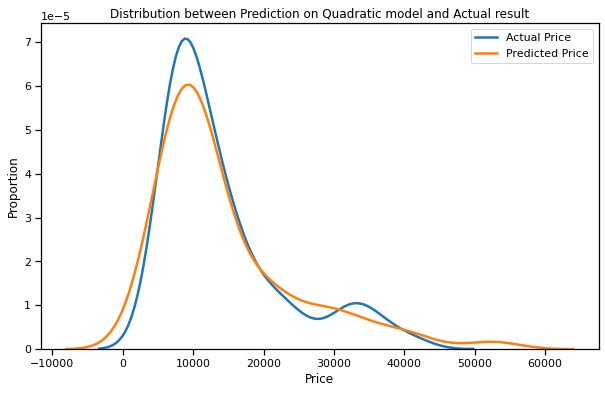

In [40]:
plt.figure(figsize=(10,6))
sb.kdeplot(y_test, label='Actual Price')
sb.kdeplot(y_pred_poly, label='Predicted Price')
plt.xlabel('Price')
plt.ylabel('Proportion')
plt.title('Distribution between Prediction on Quadratic model and Actual result')
plt.show()

## Conclusion:
- Linear Regression have good result (r2 92%) in this data set

- Quadratic not better than Linear Regression

- This data set is small, and difference split train, test can have very difference in result.

## Finished!